In [38]:
###### Analysis Notebook
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import calendar
from matplotlib import interactive
interactive(True)
import gmaps
import os
from pprint import pprint as pp

# Import API key
from api_keys import g_key

illinoisData = "illinoisData.csv"
illinoisData_df = pd.read_csv(illinoisData) 

travelGroupClean = "travelGroupSum.csv"
travelGroupClean_df = pd.read_csv(travelGroupClean) 
travelGroupClean_df

,Date,State Postal Code,Number of Trips,POPESTIMATE2019,Number of cases,Daily New Cases
0,2/1/2020,AK,2495859.0,731545,0,0
1,2/1/2020,AL,15448035.0,4903185,0,0
2,2/1/2020,AR,9800865.0,3017804,0,0
3,2/1/2020,AZ,24657576.0,7278717,1,0
4,2/1/2020,CA,142175520.0,39512223,4,0
...,...,...,...,...,...,...
7696,6/9/2020,VT,2460307.0,623989,1078,8
7697,6/9/2020,WA,21009766.0,7614893,24328,318
7698,6/9/2020,WI,18583770.0,5822434,21308,275
7699,6/9/2020,WV,6124451.0,1792147,2167,16


In [39]:
slopeL = []
interceptL = []
rvalueL = []
pvalueL = []
stderrL = []
states = []
statesList = travelGroupClean_df["State Postal Code"].unique().tolist()


In [40]:
for row in statesList:
    stateTrips = travelGroupClean_df.loc[travelGroupClean_df["State Postal Code"] == row]
    stateNumTrips = stateTrips["Number of Trips"]
    stateNewCases = stateTrips["Daily New Cases"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(stateNumTrips, stateNewCases)
    slopeL.append(slope)
    interceptL.append(intercept)
    rvalueL.append(rvalue)
    pvalueL.append(pvalue)
    stderrL.append(stderr)
    states.append(row)
summary_df = {"State": states, "Slope": slopeL, "Intercept": interceptL, "R-Value": rvalueL, "P-Value": pvalueL, "Std Err": stderrL}
summary_df = pd.DataFrame(summary_df)
summary_df.sort_values("R-Value", ascending = False)
summary_df

,State,Slope,Intercept,R-Value,P-Value,Std Err
0,AK,-1.119022e-05,31.288153,-0.497635,7.999471e-11,1.597893e-06
1,AL,-4.206373e-05,887.090727,-0.247682,2.168015e-03,1.347948e-05
2,AR,-1.051636e-05,230.322173,-0.065871,4.216381e-01,1.305071e-05
3,AZ,-8.890367e-05,2339.037233,-0.313974,8.641699e-05,2.202398e-05
4,CA,-3.441585e-05,5199.340467,-0.530239,2.526207e-12,4.508288e-06
5,CO,-3.458982e-05,925.204370,-0.540736,7.661506e-13,4.408236e-06
6,CT,-1.160723e-04,1663.007220,-0.463180,2.117444e-09,1.819485e-05
7,DC,-3.845089e-05,279.582753,-0.492321,1.358117e-10,5.569175e-06
8,DE,-4.676680e-05,222.834347,-0.216095,7.700801e-03,1.731074e-05
9,FL,-4.140390e-05,3694.113917,-0.218136,7.130083e-03,1.517520e-05


In [41]:
summary_df.to_csv('summaryStats_df.csv') 

In [42]:
illinoisData_df

,Level,Date,State Postal Code,State,County Name,Population Staying at Home Percentage,Population Not Staying at Home Percentage,Number of Trips,Number of cases,Est. Med HH Income 2018,POPESTIMATE2019,Lat,Lng,Daily New Cases
0,County,2/1/2020,IL,Illinois,Edgar County,21.72%,78.28%,63099.0,0,51109.0,17161,39.713122,-87.776333,0
1,County,2/2/2020,IL,Illinois,Edgar County,22.97%,77.03%,58833.0,0,51109.0,17161,39.713122,-87.776333,0
2,County,2/3/2020,IL,Illinois,Edgar County,21.07%,78.93%,77640.0,0,51109.0,17161,39.713122,-87.776333,0
3,County,2/4/2020,IL,Illinois,Edgar County,20.47%,79.53%,73672.0,0,51109.0,17161,39.713122,-87.776333,0
4,County,2/5/2020,IL,Illinois,Edgar County,20.31%,79.69%,69017.0,0,51109.0,17161,39.713122,-87.776333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,County,6/26/2020,IL,Illinois,Pope County,13.44%,86.56%,17792.0,1,40671.0,4177,37.417132,-88.595175,0
15398,County,6/27/2020,IL,Illinois,Pope County,22.03%,77.97%,16168.0,1,40671.0,4177,37.417132,-88.595175,0
15399,County,6/28/2020,IL,Illinois,Pope County,17.66%,82.34%,13667.0,1,40671.0,4177,37.417132,-88.595175,0
15400,County,6/29/2020,IL,Illinois,Pope County,18.61%,81.39%,18049.0,1,40671.0,4177,37.417132,-88.595175,0


In [43]:
illinois_single_day_df = illinoisData_df.loc[illinoisData_df["Date"] == "6/1/2020"]
illinois_single_day_df.head()

,Level,Date,State Postal Code,State,County Name,Population Staying at Home Percentage,Population Not Staying at Home Percentage,Number of Trips,Number of cases,Est. Med HH Income 2018,POPESTIMATE2019,Lat,Lng,Daily New Cases
121,County,6/1/2020,IL,Illinois,Edgar County,18.96%,81.04%,78159.0,1,51109.0,17161,39.713122,-87.776333,0
272,County,6/1/2020,IL,Illinois,DuPage County,25.8%,74.2%,2855520.0,7765,88711.0,922921,41.824383,-88.090076,58
423,County,6/1/2020,IL,Illinois,Douglas County,20.4%,79.6%,93589.0,28,54218.0,19465,39.761763,-88.207160,0
574,County,6/1/2020,IL,Illinois,DeKalb County,20.19%,79.81%,366930.0,418,61086.0,104897,41.832998,-88.710896,2
725,County,6/1/2020,IL,Illinois,De Witt County,22.47%,77.53%,63821.0,4,55591.0,15638,40.181036,-88.903060,0


In [44]:
 # Set x axis and tick locations
x_axis = np.arange(len(illinois_single_day_df))
tick_locations = [value for value in x_axis]

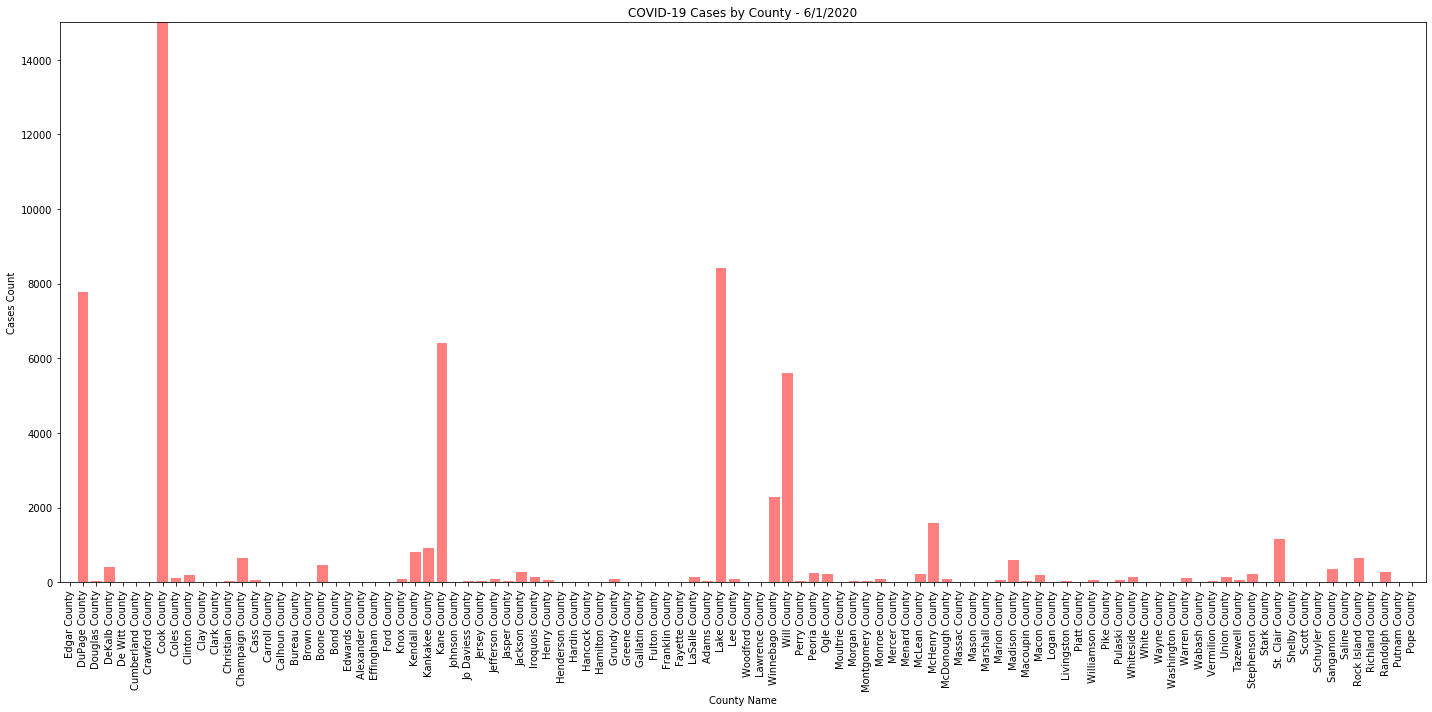

Note:  Cook County case count = 78,495


In [45]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, illinois_single_day_df["Number of cases"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, illinois_single_day_df["County Name"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 15000)
plt.title("COVID-19 Cases by County - 6/1/2020")
plt.xlabel("County Name")
plt.ylabel("Cases Count")
plt.tight_layout()
plt.show()
print("Note:  Cook County case count = 78,495")

In [46]:
illinois_single_day_df

,Level,Date,State Postal Code,State,County Name,Population Staying at Home Percentage,Population Not Staying at Home Percentage,Number of Trips,Number of cases,Est. Med HH Income 2018,POPESTIMATE2019,Lat,Lng,Daily New Cases
121,County,6/1/2020,IL,Illinois,Edgar County,18.96%,81.04%,78159.0,1,51109.0,17161,39.713122,-87.776333,0
272,County,6/1/2020,IL,Illinois,DuPage County,25.8%,74.2%,2855520.0,7765,88711.0,922921,41.824383,-88.090076,58
423,County,6/1/2020,IL,Illinois,Douglas County,20.4%,79.6%,93589.0,28,54218.0,19465,39.761763,-88.207160,0
574,County,6/1/2020,IL,Illinois,DeKalb County,20.19%,79.81%,366930.0,418,61086.0,104897,41.832998,-88.710896,2
725,County,6/1/2020,IL,Illinois,De Witt County,22.47%,77.53%,63821.0,4,55591.0,15638,40.181036,-88.903060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,County,6/1/2020,IL,Illinois,Rock Island County,25.12%,74.88%,479398.0,661,52630.0,141879,41.399821,-90.563609,3
14919,County,6/1/2020,IL,Illinois,Richland County,20.05%,79.95%,61955.0,3,48724.0,15513,38.721279,-88.090076,0
15070,County,6/1/2020,IL,Illinois,Randolph County,19.55%,80.45%,121410.0,269,52107.0,31782,38.062932,-89.775534,0
15221,County,6/1/2020,IL,Illinois,Putnam County,14.49%,85.51%,24745.0,1,65034.0,5739,41.238474,-89.284725,0


In [47]:
illinois_single_day_df["weighted_case_count"] = illinois_single_day_df["Number of cases"]/illinois_single_day_df["POPESTIMATE2019"]

C:\Users\rewel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
illinois_single_day_df

,Level,Date,State Postal Code,State,County Name,Population Staying at Home Percentage,Population Not Staying at Home Percentage,Number of Trips,Number of cases,Est. Med HH Income 2018,POPESTIMATE2019,Lat,Lng,Daily New Cases,weighted_case_count
121,County,6/1/2020,IL,Illinois,Edgar County,18.96%,81.04%,78159.0,1,51109.0,17161,39.713122,-87.776333,0,0.000058
272,County,6/1/2020,IL,Illinois,DuPage County,25.8%,74.2%,2855520.0,7765,88711.0,922921,41.824383,-88.090076,58,0.008414
423,County,6/1/2020,IL,Illinois,Douglas County,20.4%,79.6%,93589.0,28,54218.0,19465,39.761763,-88.207160,0,0.001438
574,County,6/1/2020,IL,Illinois,DeKalb County,20.19%,79.81%,366930.0,418,61086.0,104897,41.832998,-88.710896,2,0.003985
725,County,6/1/2020,IL,Illinois,De Witt County,22.47%,77.53%,63821.0,4,55591.0,15638,40.181036,-88.903060,0,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,County,6/1/2020,IL,Illinois,Rock Island County,25.12%,74.88%,479398.0,661,52630.0,141879,41.399821,-90.563609,3,0.004659
14919,County,6/1/2020,IL,Illinois,Richland County,20.05%,79.95%,61955.0,3,48724.0,15513,38.721279,-88.090076,0,0.000193
15070,County,6/1/2020,IL,Illinois,Randolph County,19.55%,80.45%,121410.0,269,52107.0,31782,38.062932,-89.775534,0,0.008464
15221,County,6/1/2020,IL,Illinois,Putnam County,14.49%,85.51%,24745.0,1,65034.0,5739,41.238474,-89.284725,0,0.000174


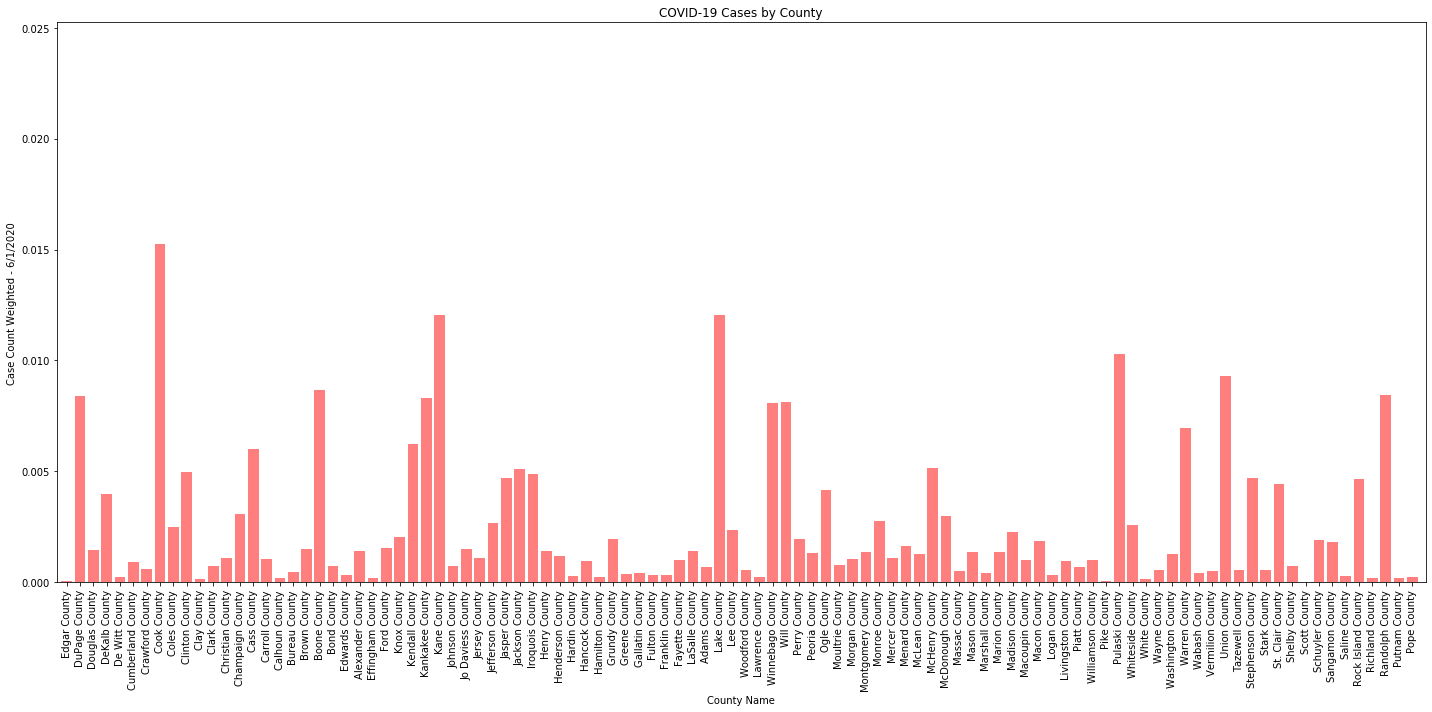

In [49]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(x_axis, illinois_single_day_df["weighted_case_count"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, illinois_single_day_df["County Name"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(illinois_single_day_df["weighted_case_count"])+.01)
plt.title("COVID-19 Cases by County")
plt.xlabel("County Name")
plt.ylabel("Case Count Weighted - 6/1/2020")
plt.tight_layout()
plt.show()

In [51]:
illinois_single_day_df.sort_values("POPESTIMATE2019", ascending = False).head()

,Level,Date,State Postal Code,State,County Name,Population Staying at Home Percentage,Population Not Staying at Home Percentage,Number of Trips,Number of cases,Est. Med HH Income 2018,POPESTIMATE2019,Lat,Lng,Daily New Cases,weighted_case_count
1178,County,6/1/2020,IL,Illinois,Cook County,27.9%,72.1%,16665101.0,78495,62088.0,5150233,41.737659,-87.697554,570,0.015241
272,County,6/1/2020,IL,Illinois,DuPage County,25.8%,74.2%,2855520.0,7765,88711.0,922921,41.824383,-88.090076,58,0.008414
7520,County,6/1/2020,IL,Illinois,Lake County,24.12%,75.88%,2283122.0,8408,86244.0,696535,42.368936,-87.827153,77,0.012071
8275,County,6/1/2020,IL,Illinois,Will County,23.41%,76.59%,2195124.0,5613,83504.0,690743,41.505472,-88.090076,47,0.008126
4349,County,6/1/2020,IL,Illinois,Kane County,23.09%,76.91%,1712150.0,6404,76912.0,532403,41.987884,-88.401604,66,0.012028


In [52]:
illinois_single_day_df["COVID-19 Cases (%)"] = (illinois_single_day_df["weighted_case_count"]*100).map('%{:,.2f}'.format)
illinois_single_day_df.sort_values("weighted_case_count", ascending = False).head()

C:\Users\rewel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Level,Date,State Postal Code,State,County Name,Population Staying at Home Percentage,Population Not Staying at Home Percentage,Number of Trips,Number of cases,Est. Med HH Income 2018,POPESTIMATE2019,Lat,Lng,Daily New Cases,weighted_case_count,COVID-19 Cases (%)
1178,County,6/1/2020,IL,Illinois,Cook County,27.9%,72.1%,16665101.0,78495,62088.0,5150233,41.737659,-87.697554,570,0.015241,%1.52
7520,County,6/1/2020,IL,Illinois,Lake County,24.12%,75.88%,2283122.0,8408,86244.0,696535,42.368936,-87.827153,77,0.012071,%1.21
4349,County,6/1/2020,IL,Illinois,Kane County,23.09%,76.91%,1712150.0,6404,76912.0,532403,41.987884,-88.401604,66,0.012028,%1.20
12050,County,6/1/2020,IL,Illinois,Pulaski County,14.08%,85.92%,22634.0,55,33799.0,5335,37.251242,-89.132487,0,0.010309,%1.03
13258,County,6/1/2020,IL,Illinois,Union County,14.46%,85.54%,74251.0,155,49182.0,16653,37.508652,-89.284725,1,0.009308,%0.93


In [53]:
def reg_plot(x_values, y_values, x_title, y_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlim(-0.001, max(x_values))
    plt.ylim(-1000,500000)
    # plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f"{x_title} vs {y_title}")
    plt.savefig(f'{x_title} vs {y_title}.png')
    r2 = round(rvalue * rvalue,4)
    plt.show()
    rvalue = round(rvalue,2)
    print(line_eq)
    print(f"Correlation Coefficient: {rvalue}")
    print(f"R2: {r2}")

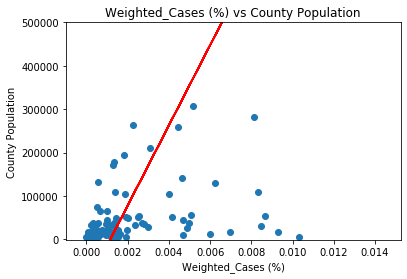

y = 92402536.24x + -106762.46
Correlation Coefficient: 0.55
R2: 0.2983


In [16]:
reg_plot(illinois_single_day_df["weighted_case_count"], illinois_single_day_df["POPESTIMATE2019"], "Weighted_Cases (%)", "County Population")

In [54]:
def reg_plot(x_values, y_values, x_title, y_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlim(-0.001, max(x_values))
    plt.ylim(-1000,4000000)
    # plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f"{x_title} vs {y_title}")
    plt.savefig(f'{x_title} vs {y_title}.png')
    r2 = round(rvalue * rvalue,4)
    plt.show()
    rvalue = round(rvalue,2)
    print(line_eq)
    print(f"Correlation Coefficient: {rvalue}")
    print(f"R2: {r2}")

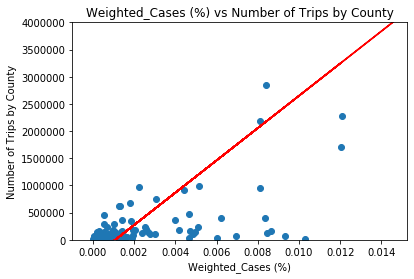

y = 297327181.97x + -322971.21
Correlation Coefficient: 0.54
R2: 0.2962


In [55]:
reg_plot(illinois_single_day_df["weighted_case_count"], illinois_single_day_df["Number of Trips"], "Weighted_Cases (%)", "Number of Trips by County")

In [56]:
def reg_plot(x_values, y_values, x_title, y_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlim(-0.001, max(x_values))
    plt.ylim(-1000,100000)
    # plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f"{x_title} vs {y_title}")
    plt.savefig(f'{x_title} vs {y_title}.png')
    r2 = round(rvalue * rvalue,4)
    plt.show()
    rvalue = round(rvalue,2)
    print(line_eq)
    print(f"Correlation Coefficient: {rvalue}")
    print(f"R2: {r2}")

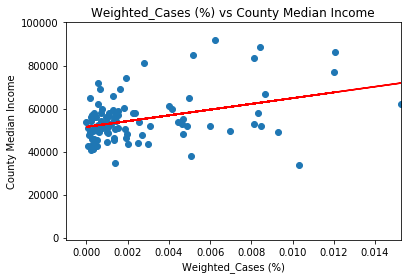

y = 1333684.1x + 51505.56
Correlation Coefficient: 0.37
R2: 0.1402


In [57]:
reg_plot(illinois_single_day_df["weighted_case_count"], illinois_single_day_df["Est. Med HH Income 2018"], "Weighted_Cases (%)", "County Median Income")

In [58]:
gmaps.configure(api_key=g_key)

#defining locations using Lat/Lng and humidity
locations = illinois_single_day_df[["Lat", "Lng"]].astype(float)
covidCases = illinois_single_day_df["Number of cases"].astype(float)

In [59]:
#printing map and defining weights using Humidity
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=covidCases, 
                                 dissipating=False, max_intensity=500,
                                 point_radius = .250)

fig.add_layer(heat_layer)
fig.figsize=(20,10)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
#illinois_single_day_df.sort_values(illinois_single_day_df["weighted_case_count"], ascending = False)

In [60]:
info_box_template = """
<dl>
<dt>Count Name</dt><dd>{County Name}</dd>
<dt>Population</dt><dd>{POPESTIMATE2019}</dd>
<dt>COVID-19 Infection (%)</dt><dd>{COVID-19 Cases (%)}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
covid_info = [info_box_template.format(**row) for index, row in illinois_single_day_df.iterrows()]
locations = illinois_single_day_df[["Lat", "Lng"]]
marker_layer = gmaps.marker_layer(locations, info_box_content=covid_info)
fig.add_layer(marker_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))